# Домашнее задание к лекции "Визуализация данных"

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.
Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


**Подготовка данных**

In [6]:
# Определяем процент пустых значений в столбце
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
release_year     0.000000
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [7]:
# Видим, что столбец 'director' имеет более 30% пропусков, в связи с чем удалим его из датафрейма для последующего анализа.
# Также удалим столбец 'cast'
df.drop(['director','cast'],axis = 1, inplace = True)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
# Столбец 'country' также содержит более 7% пропущенных значений. 
# В связи с тем, что Netflix является американской платформой, то заполним пропуски значением 'United States' 
df['country'].fillna('United States', inplace = True)

**Определение преобладающих стран-производителей шоу(фильмов и ТВ-шоу), размещенных на Netflix**

In [9]:
df_country_count = df[['country','show_id']].groupby('country').count().sort_values('show_id',ascending=False)

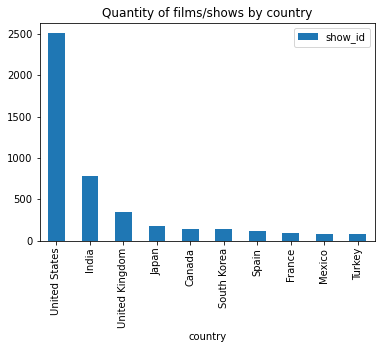

In [10]:
df_country_count.iloc[0:10].plot(kind='bar', 
                                 title='Quantity of films/shows by country')

In [11]:
print(f'Вывод:{round((df_country_count.iloc[0:10].sum()/df_country_count.sum())[0]*100)}% всех фильмов,телешоу, размещенных на Netflix произведены в 10 основных странах,представленных на графике')
print(f'{round((df_country_count.iloc[0].sum()/df_country_count.sum())[0]*100)}% контента платформы прозведено в США')

Вывод:71.0% всех фильмов,телешоу, размещенных на Netflix произведены в 10 основных странах,представленных на графике
40.0% контента платформы прозведено в США


**Распределение шоу на Netflix по типам: фильмы и ТВ-шоу**

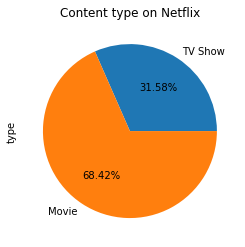

In [12]:
df_type_count = df['type'].value_counts().sort_values()
df_type_count.plot(kind='pie',
                  title='Content type on Netflix',
                  autopct='%1.2f%%')

In [13]:
print(f'Вывод: преимущественно на Netflix размещены фильмы, процент от общего числа всех шоу {round(df_type_count[1]/df_type_count.sum()*100,2)}')

Вывод: преимущественно на Netflix размещены фильмы, процент от общего числа всех шоу 68.42


**Длительность фильмов и ТВ-шоу**

In [14]:
df_duration = df[['type','duration']]

In [15]:
df_duration['duration_in_min'] = df_duration.duration.str.extract('(\d+)')

<ipython-input-15-42937e6afbc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['duration_in_min'] = df_duration.duration.str.extract('(\d+)')


In [16]:
df_duration.head()

,type,duration,duration_in_min
0,Movie,90 min,90
1,Movie,94 min,94
2,TV Show,1 Season,1
3,TV Show,1 Season,1
4,Movie,99 min,99


In [24]:
df_duration['duration_in_min']=df_duration['duration_in_min'].astype('float').astype('Int64')

<ipython-input-24-ba8f8e8b001a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['duration_in_min']=df_duration['duration_in_min'].astype('float').astype('Int64')


In [33]:
filter_df_movie = df_duration[df_duration.type=='Movie']

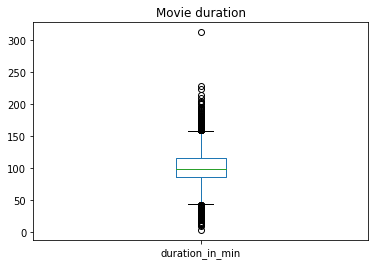

In [38]:
filter_df_movie.duration_in_min.plot(kind='box',
                   title='Movie duration')

**Вывод**: средняя продолжительность фильмов около 95 минут. В основном длительность фильма варьируется в диапозоне между 80 и 120 минутами. Наблюдается 1 выброс: фильм с продолжительность более 300 минут. Проверим, является ли это ошибкой данных или действительностью

In [46]:
filter_df_movie[filter_df_movie.duration_in_min == max(filter_df_movie.duration_in_min)]

,type,duration,duration_in_min
4315,Movie,312 min,312


In [53]:
print(f'Фильм {df.loc[4315,"title"]} имеет продолжительность 312 мин. В некоторых источниках в интернете указывается, что Черное зеркало - интерактивный фильм общей длительностью 312 минут, в котором зритель сам может выбирать, как будет развиваться сюжет')

Фильм Black Mirror: Bandersnatch имеет продолжительность 312 мин. В некоторых источниках в интернете указывается, что Черное зеркало - интерактивный фильм общей длительностью 312 минут, в котором зритель сам может выбирать, как будет развиваться сюжет


In [37]:
filter_df_show = df_duration[df_duration.type=='TV Show']

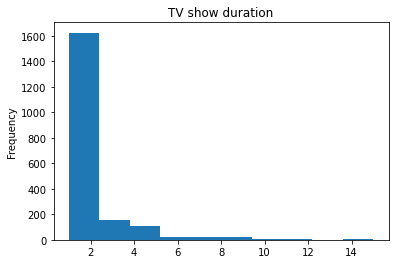

In [43]:
filter_df_show.duration_in_min.plot(kind='hist', 
                   title='TV show duration')

**Вывод**: большинство ТВ-шоу на Netflix имеют 1 - 2 серии, однако есть и многосерийные шоу с длительностью более 10 серий

**Анализ наполнения контентом платформы во времени**

In [54]:
df['date_added']= pd.to_datetime(df['date_added'])

In [56]:
df['year_added'] = df['date_added'].dt.year

In [68]:
df_time = df.pivot_table(index='year_added',columns='type',values='show_id',aggfunc='count',fill_value=0,margins=True)

In [74]:
df_time1=df_time.iloc[1:13,:]
df_time1

type,Movie,TV Show,All
year_added,,,
2009.0,2,0,2
2010.0,1,0,1
2011.0,13,0,13
2012.0,4,3,7
2013.0,6,6,12
2014.0,19,6,25
2015.0,58,32,90
2016.0,264,192,456
2017.0,913,387,1300


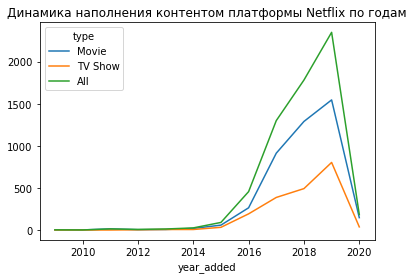

In [77]:
ax = df_time1.plot(title='Динамика наполнения контентом платформы Netflix по годам')

**Вывод**: Рост контента начинается с 2013 года,когда компания Netflix начинает производить собственные фильмы и сериалы, а также телепрограммы. Рост числа фильмов значительно выше, чем телешоу. Наибольшее развитие приходится на 2018-2019г. За 2020г. статистика неполная, в связи с этим видим спад на графике

**Общий вывод по работе**:
* наполнение конентом площадки началось ранее 2010г., активный рост - с 2013г., когда Netflix начинает производить собственные фильмы и телешоу, а наибольшее количество добавленных фильмов и шоу приходится на 2018-2019гг.
* преимущественно на Netflix размещены фильмы - 69% от общего количества, остальное - телешоу
* средняя длительность фильмов - 95 мин.
* телешоу преимущественно состоят из 1-2 серий
* 40% размещенного на Netflix контента производится США. Следующие по распространенности страны- производители: Индия и Великобритания